In [46]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import scipy as sp
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-dark")
sns.set_palette("bright")
b, o, g, r, p, brown, pink, grey, y, lb = np.array(sns.color_palette())

mpl.rc('axes', labelsize=14, titlesize=16)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
import pandas as pd
data = pd.read_csv("/home/claym0re/Projects/python3/machine-learning/ml-algorithms/datasets/house-prices/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.corrwith(data.YearBuilt).abs().sort_values(ascending=False)

YearBuilt        1.000000
GarageYrBlt      0.825667
YearRemodAdd     0.592855
OverallQual      0.572323
GarageCars       0.537850
SalePrice        0.522897
GarageArea       0.478954
FullBath         0.468271
TotalBsmtSF      0.391452
EnclosedPorch    0.387268
OverallCond      0.375983
MasVnrArea       0.315707
1stFlrSF         0.281986
BsmtFinSF1       0.249503
HalfBath         0.242656
WoodDeckSF       0.224880
GrLivArea        0.199010
OpenPorchSF      0.188686
BsmtFullBath     0.187599
LowQualFinSF     0.183784
KitchenAbvGr     0.174800
BsmtUnfSF        0.149040
Fireplaces       0.147716
LotFrontage      0.123349
TotRmsAbvGrd     0.095589
BedroomAbvGr     0.070651
ScreenPorch      0.050364
BsmtFinSF2       0.049107
BsmtHalfBath     0.038162
MiscVal          0.034383
3SsnPorch        0.031355
MSSubClass       0.027850
LotArea          0.014228
YrSold           0.013618
Id               0.012713
MoSold           0.012398
2ndFlrSF         0.010308
PoolArea         0.004950
dtype: float

In [5]:
data_price_year = data[["SalePrice", "YearBuilt"]]
X = data_price_year.SalePrice.to_numpy().reshape(-1,1)
y = data_price_year.YearBuilt.to_numpy().reshape(-1,)

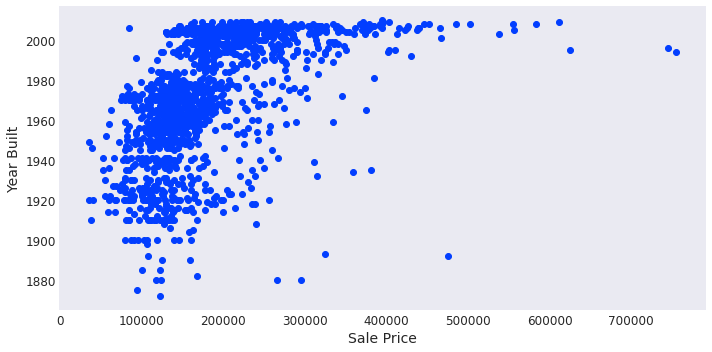

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(X, y)
plt.xlabel("Sale Price")
plt.ylabel("Year Built")
plt.tight_layout()

In [7]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X, y)

LinearRegression()

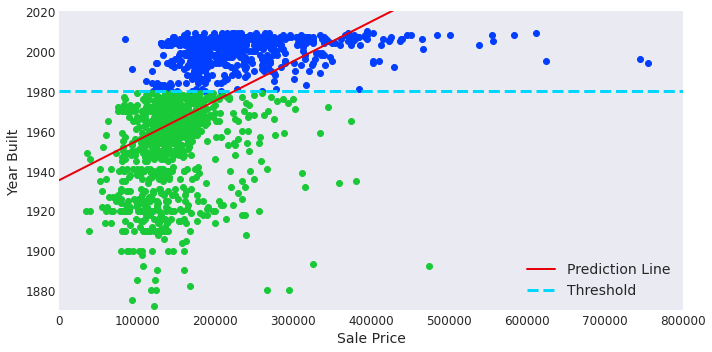

In [8]:
## Lets Classify between New and Old Houses
## New Houses are built after 1980, and Old Houses before 1980

linreg_linspace= np.linspace(0, 810000, 10000).reshape(-1,1)
threshold = 1980

plt.figure(figsize=(10,5))
data_new_houses = data_price_year.iloc[data_price_year.YearBuilt.values >= threshold].copy()
data_old_houses = data_price_year.iloc[data_price_year.YearBuilt.values < threshold].copy()

plt.scatter(data_new_houses.SalePrice, data_new_houses.YearBuilt, color=b)
plt.scatter(data_old_houses.SalePrice, data_old_houses.YearBuilt, color=g)

plt.plot(linreg_linspace,linear_regression.predict(linreg_linspace), color=r,  lw=2, label="Prediction Line")
plt.hlines(threshold, xmin=0, xmax=1000000, colors=lb, linestyles='--', lw=3, label='Threshold')

plt.axis([0, 800000, 1870, 2020])
plt.xlabel("Sale Price")
plt.ylabel("Year Built")
plt.legend(loc="lower right", fontsize=14)

plt.tight_layout()

In [10]:
data_new_houses["YearBuilt"] = 1
data_old_houses["YearBuilt"] = 0
data_binary = pd.concat([data_new_houses, data_old_houses], ignore_index=True)
data_binary = data_binary.sample(frac=1, random_state=42).reset_index(drop=True).to_numpy()

In [11]:
y_bin = data_binary[:,1].reshape(-1,)
y_bin

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
def linear_regression_classification(model, X, threshold):
    model_predictions = model.predict(X)
    return np.array([0 if prediction <= threshold else 1 for prediction in model_predictions])

linreg_predictions = linear_regression_classification(linear_regression, X, threshold)
linreg_predictions

array([0, 0, 0, ..., 1, 0, 0])

In [13]:
def model_accuracy(y, y_pred):
    return np.sum(list(y) == np.array(list(y_pred)))/ len(list(y))

linreg_accuracy = model_accuracy(y_bin, linreg_predictions)

print("Linreg Classifier Accuracy: ",  linreg_accuracy,
    "\nOnly Ones Accuracy: ", model_accuracy(y_bin, list(np.ones((y_bin.shape)))),
    "\nOnly Zeros Accuracy: ", model_accuracy(y_bin, list(np.zeros((y_bin.shape)))))

Linreg Classifier Accuracy:  0.5595890410958904 
Only Ones Accuracy:  0.4191780821917808 
Only Zeros Accuracy:  0.5808219178082191


In [14]:
##55% correct, not bad, but i think we can do better with a specialized classification model
##lets first scaled the X values, because we are going to use a Gradient Descent Logistic Regression

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

X_bin = standard_scaler.fit_transform(data_binary[:,0].reshape(-1,1))

## $$ h(x) = g(Θ' * x) .$$
## $$ g(z) = 1 / (1 + e ^(-(z)).$$

In [71]:
class Scratch_LogisticRegression:
    '''Gradient Descent for Logistic Regression Classification'''
    def __init__(self, learning_rate=0.0001, max_iter=1000, multi_class=False, tol=1e-6):
        self.alpha = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.weights = None
        self.bias = None
        self.train_accuracy = None
        self.X = X
        self.y = y
        self.multi_class = multi_class

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = np.random.normal(0,1)

        # gradient descent
        for _ in range(self.max_iter):
            y_pred = sp.special.expit(self.decision_function(X))

            # calculating the gradients
            dW = (1. / n_samples) * np.dot(X.T, (y_pred - y))
            dB = (1. / n_samples) * np.sum(y_pred - y)
            
            # updating the parameters
            self.weights -= self.alpha * dW
            self.bias -= self.alpha * dB
        
        self.train_accuracy = np.sum(list(y) == self.predict(X))/len(list(y))
    
    def decision_function(self, X):
        return np.dot(X , self.weights) + self.bias
    
    def predict(self, X):
        y_pred = sp.special.expit(self.decision_function(X))
        return np.array([1 if yi > 0.5 else 0 for yi in y_pred])
    
    def score(self, X, y):
        return np.sum(list(y) == self.predict(X))/len(list(y))
                                            
    def transform(self, X, y):
        pass

In [73]:
logistic_regression = Scratch_LogisticRegression(learning_rate=0.001, max_iter=100000)
logistic_regression.fit(X_bin, y_bin)
print("Scratch Model - Logistic Regression Accuracy:", logistic_regression.train_accuracy)

Scratch Model - Logistic Regression Accuracy: 0.7842465753424658


In [1]:
print("Logistic Regression Model Accuracy: ", logistic_regression.train_accuracy,
    "\n\nLinear Regression Classifier Accuracy: ",  linreg_accuracy,
    "\n\nOnly Ones Accuracy: ", model_accuracy(y_bin, list(np.ones((y_bin.shape)))),
    "\n\nOnly Zeros Accuracy: ", model_accuracy(y_bin, list(np.zeros((y_bin.shape)))))

NameError: name 'logistic_regression' is not defined

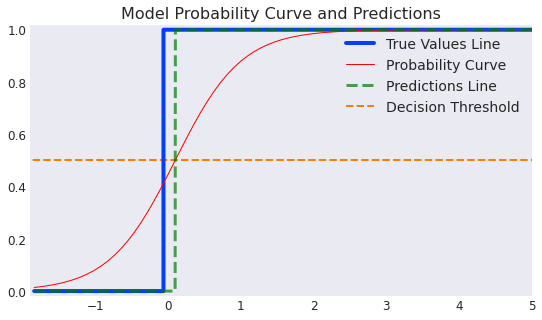

In [75]:
#sort X values in a ascending order to plot 
data_binary_sorted = np.sort(np.c_[X_bin, y_bin], axis=0)
data_predicted_sorted = np.sort(np.c_[X_bin, logistic_regression.predict(X_bin)], axis=0)

sigmoid_linspace = np.linspace(np.min(X_bin), np.max(X_bin), 100).reshape(-1,1)

fig = plt.figure(figsize=(9,5))
plt.plot(data_binary_sorted[:,0].reshape(-1,1), data_binary_sorted[:,1], lw=4, label="True Values Line")
plt.plot(sigmoid_linspace, sp.special.expit(logistic_regression.decision_function(sigmoid_linspace)), "r-", lw=1, label="Probability Curve")
plt.plot(data_predicted_sorted[:,0], data_predicted_sorted[:,1], "g--", lw=3, alpha=0.7, label="Predictions Line")
plt.hlines(0.5, xmin=-2, xmax=6, color=o, linestyle='--', lw=2, label='Decision Threshold')
plt.axis([-1.9, 5, -0.02, 1.02])
plt.legend(fontsize=14)
plt.title("Model Probability Curve and Predictions")
plt.show()

### Lets compare our Logistic Regression Model from Scratch with the SKLearn Model to see with our algorithm is performing as expected.

In [77]:
from sklearn.linear_model import LogisticRegression
sklearn_logistic_regression = LogisticRegression(penalty="none", random_state=42, max_iter=100000, solver="saga")
sklearn_logistic_regression.fit(X_bin, y_bin)
print("Scratch Model Accuracy:", logistic_regression.train_accuracy,
    "\nSKLearn Model Accuracy: ", sklearn_logistic_regression.score(X_bin, y_bin))

Scratch Model Accuracy: 0.7842465753424658 
SKLearn Model Accuracy:  0.7842465753424658


In [78]:
print("Scratch Model Bias:", logistic_regression.bias,
    "\nScratch Model Weights: ", logistic_regression.weights[0],
    "\n\nSKLearn Model Bias:",  sklearn_logistic_regression.intercept_[0],
    "\nSKLearn Model Weights: ", sklearn_logistic_regression.coef_[0,0])

Scratch Model Bias: -0.21838195146023204 
Scratch Model Weights:  2.2054055258226226 

SKLearn Model Bias: -0.2183371414680954 
SKLearn Model Weights:  2.2171721682306775


In [79]:
def average_confidence(sig_decision_function, y_pred):
    """Average Confidence: return a coeficcient ranging from 0(very low confidence) from 1(very high confidence), 
    based on models probability decision curve."""
    
    return 1-(np.sum(np.abs(sig_decision_function - y_pred))/y_pred.shape[0])*2

print("Scratch Model -  Average Confidence Coefficient: ",  average_confidence(sp.special.expit(logistic_regression.decision_function(X_bin)),logistic_regression.predict(X_bin)),
      "\nSKLearn Model - Average Confidence Coefficient: ", average_confidence(sp.special.expit(sklearn_logistic_regression.decision_function(X_bin)), sklearn_logistic_regression.predict(X_bin)))

Scratch Model -  Average Confidence Coefficient:  0.5616107064997331 
SKLearn Model - Average Confidence Coefficient:  0.5631439767930371


In [80]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

scratch_model_cm = confusion_matrix(y_bin, logistic_regression.predict(X_bin))
sklearn_model_cm = confusion_matrix(y_bin, sklearn_logistic_regression.predict(X_bin))

scratch_model_cm, sklearn_model_cm

(array([[745, 103],
        [212, 400]]),
 array([[745, 103],
        [212, 400]]))

In [81]:
def classifier_scores(confusion_matrix):
    
    TrueNegatives, FalsePositives, FalseNegatives, TruePositives = confusion_matrix.reshape(-1)
    
    precision = TruePositives / (TruePositives + FalsePositives + 1) 
    
    recall = TruePositives / (TruePositives + FalseNegatives + 1) 
        
    f1_score = 2 * (( precision * recall) / (precision + recall))
        
    #print(f"Returning: precision({precision}), recall({recall}) and F1 Score({f1_score}).")
    
    return precision, recall, f1_score

scratch_precision, scratch_recall, scratch_f1_score = classifier_scores(scratch_model_cm)
sklearn_precision, sklearn_recall, sklearn_f1_score = classifier_scores(sklearn_model_cm)

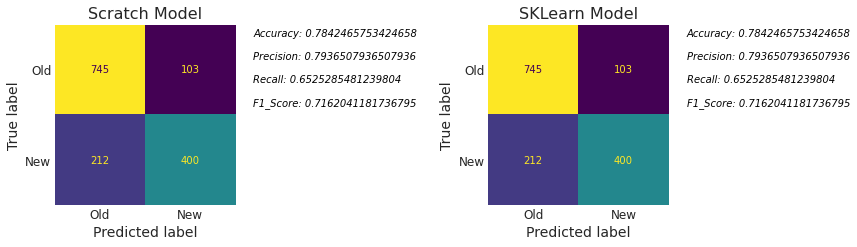

In [82]:
fig = plt.figure(figsize=(11,10))

ax1 = plt.subplot(131, title="Scratch Model")
ConfusionMatrixDisplay(confusion_matrix=scratch_model_cm, display_labels=["Old", "New"]).plot(colorbar=False, ax=ax1)

scratch_plot_text = f"Accuracy: {logistic_regression.train_accuracy}\n\nPrecision: {scratch_precision}\n\nRecall: {scratch_recall}\n\nF1_Score: {scratch_f1_score}"
plt.text(1.7, 0.4, scratch_plot_text, fontsize=10, style="italic", color="black", horizontalalignment="left")

ax3 = plt.subplot(133, title="SKLearn Model")
ConfusionMatrixDisplay(confusion_matrix=sklearn_model_cm, display_labels=["Old", "New"]).plot(colorbar=False, ax=ax3)

sklearn_plot_text = f"Accuracy: {sklearn_logistic_regression.score(X_bin, y_bin)}\n\nPrecision: {sklearn_precision}\n\nRecall: {sklearn_recall}\n\nF1_Score: {sklearn_f1_score}"
plt.text(1.7, 0.4, sklearn_plot_text, fontsize=10, style="italic", color="black", horizontalalignment="left")

plt.show()

In [83]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_bin, sp.special.expit(logistic_regression.decision_function(X_bin)))

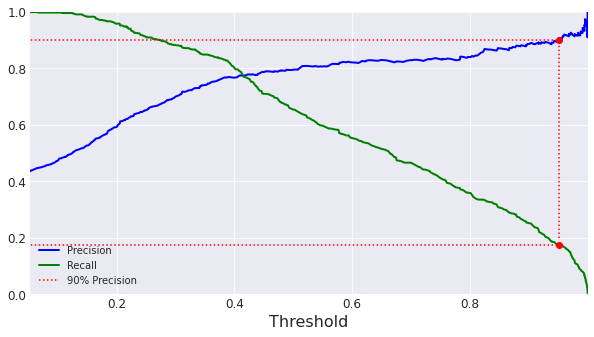

In [84]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_bin, sp.special.expit(logistic_regression.decision_function(X_bin)))

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="lower right", fontsize=16)    
    plt.xlabel("Threshold", fontsize=16)         
    plt.grid(True)                               
    plt.axis([thresholds.min(), thresholds.max(), 0, 1])              



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(10, 5.2))                                                                   
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0.2, 0.9], "r:", label="90% Precision")       
plt.plot([-3, threshold_90_precision], [0.9, 0.9], "r:")  
plt.plot([-3, threshold_90_precision], [recall_90_precision,recall_90_precision], "r:") 

plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], recall_90_precision, "ro") 
plt.legend()
plt.show()

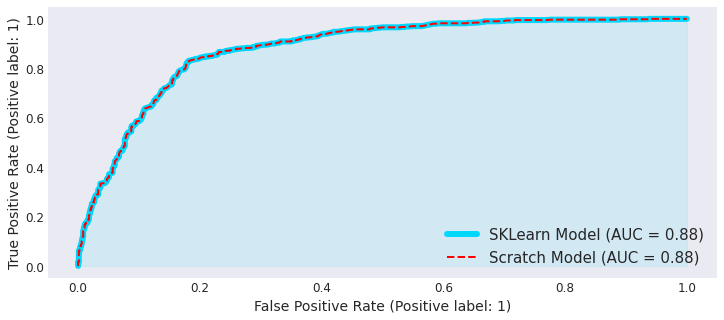

In [90]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve


plt.figure(figsize=(12,5))
ax1 = plt.subplot(111)

RocCurveDisplay.from_predictions(y_bin, sklearn_logistic_regression.decision_function(X_bin), ax=ax1, name="SKLearn Model", lw=6, color=lb)
RocCurveDisplay.from_predictions(y_bin, logistic_regression.decision_function(X_bin), ax=ax1, name="Scratch Model", linestyle='--', color='r', lw=2)

y_pred_prob = sp.special.expit(logistic_regression.decision_function(X_bin))
fpr , tpr, thresholds = roc_curve(y_bin, y_pred_prob)
plt.fill_between(fpr, tpr, color=lb, alpha=0.1)

plt.legend(loc="lower right", fontsize=15)
plt.show()

In [91]:
def binarize(x, threshold=1980):
    if x >= threshold:
        x = 1
    else: x = 0
    return x

data_multi = data[["SalePrice", "OverallQual", "LotFrontage", "FullBath", "Fireplaces", "GarageCars", "GarageArea", "YearBuilt"]].copy()

data_multi.loc[:, "YearBuilt"] = data_multi.YearBuilt.apply(binarize)
data_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SalePrice    1460 non-null   int64  
 1   OverallQual  1460 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   FullBath     1460 non-null   int64  
 4   Fireplaces   1460 non-null   int64  
 5   GarageCars   1460 non-null   int64  
 6   GarageArea   1460 non-null   int64  
 7   YearBuilt    1460 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 91.4 KB


In [92]:
y_multivar = data_multi["YearBuilt"]
X_multivar = data_multi.drop("YearBuilt", axis=1).astype('float64')

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_multivar, y_multivar, test_size=0.2, random_state=42, stratify=y_multivar)

print(f"train size -  {np.bincount(y_train)}   |   test size -  {np.bincount(y_test)}")
print(f"\ntrain proportion -  {np.bincount(y_train)[0]/np.bincount(y_train)[1]}   |   test proportion -  {np.bincount(y_test)[0]/np.bincount(y_test)[1]}")

train size -  [678 490]   |   test size -  [170 122]

train proportion -  1.383673469387755   |   test proportion -  1.3934426229508197


In [94]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

column_transformer = ColumnTransformer([
    ("imputer", SimpleImputer(), ["LotFrontage"]),
    ("minmax1", MinMaxScaler((0,5)), ["SalePrice"]),
    ("minmax2", MinMaxScaler((0,5)), ["GarageArea", "LotFrontage"])],remainder="passthrough")

In [95]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
pipeline = make_pipeline(column_transformer, standard_scaler, SimpleImputer(), Scratch_LogisticRegression(learning_rate=0.001, max_iter=100000))

In [96]:
pipeline.fit(X_multivar, y_multivar)
print("Scratch Logistic Regression Pipeline Accuracy:", pipeline.score(X_multivar, y_multivar))

Scratch Logistic Regression Pipeline Accuracy: 0.8691780821917808


In [97]:
pipe_cm = confusion_matrix(y_multivar, pipeline.predict(X_multivar)) 
pipe_precision, pipe_recall, pipe_f1_score = classifier_scores(pipe_cm)

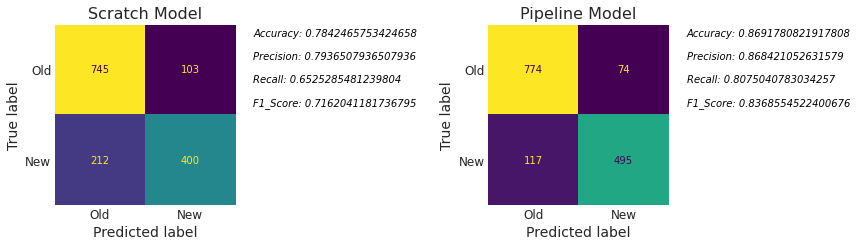

In [99]:
fig = plt.figure(figsize=(11,10))

ax1 = plt.subplot(131, title="Scratch Model")
ConfusionMatrixDisplay(confusion_matrix=scratch_model_cm, display_labels=["Old", "New"]).plot(colorbar=False, ax=ax1)

scratch_plot_text = f"Accuracy: {logistic_regression.train_accuracy}\n\nPrecision: {scratch_precision}\n\nRecall: {scratch_recall}\n\nF1_Score: {scratch_f1_score}"
plt.text(1.7, 0.4, scratch_plot_text, fontsize=10, style="italic", color="black", horizontalalignment="left")

ax3 = plt.subplot(133, title="Pipeline Model")
ConfusionMatrixDisplay(confusion_matrix=pipe_cm, display_labels=["Old", "New"]).plot(colorbar=False, ax=ax3)

sklearn_plot_text = f"Accuracy: {pipeline.score(X_multivar, y_multivar)}\n\nPrecision: {pipe_precision}\n\nRecall: {pipe_recall}\n\nF1_Score: {pipe_f1_score}"
plt.text(1.7, 0.4, sklearn_plot_text, fontsize=10, style="italic", color="black", horizontalalignment="left")

plt.show()

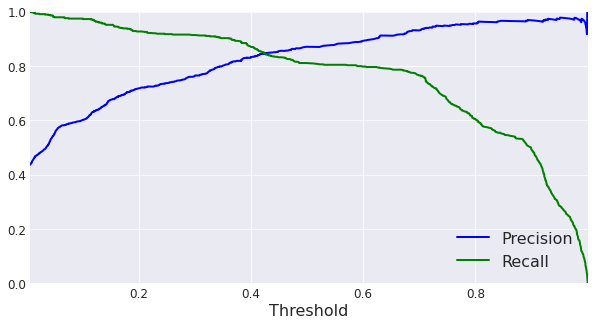

In [100]:
pipe_precisions, pipe_recalls, pipe_thresholds = precision_recall_curve(y_multivar, sp.special.expit(pipeline.decision_function(X_multivar)))

fig = plt.figure(figsize=(10,5))
plot_precision_recall_vs_threshold(pipe_precisions, pipe_recalls, pipe_thresholds)
plt.show()

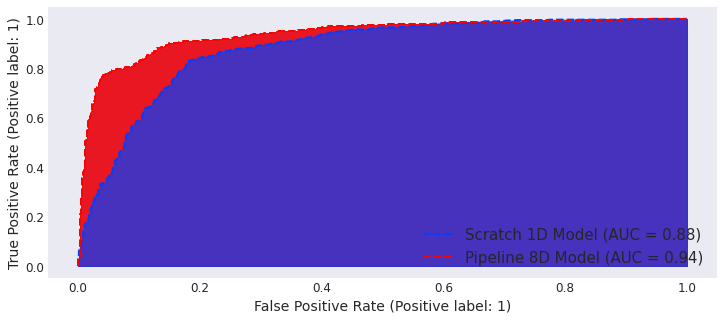

In [101]:
plt.figure(figsize=(12,5))
ax1 = plt.subplot(111)

y_pred_proba = sp.special.expit(pipeline.decision_function(X_multivar))
fpr2 , tpr2, thresholds2 = roc_curve(y_multivar, y_pred_proba)

RocCurveDisplay.from_predictions(y_bin, logistic_regression.decision_function(X_bin), ax=ax1, name="Scratch 1D Model", lw=2, linestyle='--', color=b)
RocCurveDisplay.from_predictions(y_multivar, pipeline.decision_function(X_multivar), ax=ax1, name="Pipeline 8D Model", linestyle='--', color='r', lw=2)

plt.fill_between(fpr2, tpr2, color=r, alpha=0.9)
plt.fill_between(fpr, tpr, color=b, alpha=0.7)

plt.legend(loc="lower right", fontsize=15)
plt.show()

In [102]:
X_multivar["YearBuilt"] = data["YearBuilt"]
pipeline_multiout = make_pipeline(column_transformer, standard_scaler, SimpleImputer())
X_transformed = pipeline_multiout.fit_transform(X_multivar)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_multiout = ohe.fit_transform(data["MSSubClass"].to_numpy().reshape(-1,1))

In [ ]:
from scipy.special import softmax

class Scratch_SoftmaxRegression:
    '''Gradient Descent for Softmax Regression Classification'''
    def __init__(self, learning_rate=0.0001, max_iter=1000, tol=1e-6):
        self.alpha = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.weights = None
        self.bias = None
        self.accuracy = None

        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # init parameters
        self.weights = np.random.rand(X.shape[1], y.shape[1])
        self.bias = np.random.normal(0,1)

        # gradient descent
        for _ in range(self.max_iter):
            y_pred = softmax(self.decision_function(X))

            # calculating the gradients
            dW = (1. / n_samples) * np.dot(X.T, (y_pred - y))
            dB = (1. / n_samples) * np.sum(y_pred - y)
                          
            if abs(np.min(dW*self.alpha))<self.tol:
                print(np.min(dW*self.alpha))
                print("tol reached, stoping gradient descent at iteration: ", _)
                break
            
            # updating the parameters
            self.weights -= self.alpha * dW
            self.bias -= self.alpha * dB

    def decision_function(self, X):
        return np.dot(X , self.weights) + self.bias
    
    def predict(self, X):
        y_pred = self.decision_function(X)
        return y_pred.argmax(axis=1)
    
    def score(self, X, y):
        return np.sum(self.predict(X) == y.argmax(axis=1).reshape(-1,))/ y.reshape(-1,1).shape[0]

In [ ]:
softmax_regression = Scratch_SoftmaxRegression(learning_rate=0.001, max_iter=1000000, tol=1e-6)
softmax_regression.fit(X_transformed, y_multiout)

In [ ]:
softmax_regression.score(X_transformed, y_multiout)

In [ ]:
fig, ax = plt.subplots(8, 2, figsize=(12, 20))
i=0
for axes, cm in zip(ax.flatten(), multilabel_cm):
    heatmap = sns.heatmap(cm, annot=True, fmt="d", cbar=False, ax=axes)
    axes.set_title("Confusion Matrix for the class - " + str(i))
    i+=1
    
plt.tight_layout()
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in double_scalars")

multilabel_precision, multilabel_recall, multilabel_f1 = [],[],[]

for c in multilabel_cm:
    pre, rec, f1s = classifier_scores(c.reshape(2,2))
    multilabel_precision.append(np.nan_to_num(pre))
    multilabel_recall.append(np.nan_to_num(rec))
    multilabel_f1.append(np.nan_to_num(f1s))

multilabel_avr_precision = np.mean(multilabel_precision)
multilabel_avr_recall = np.mean(multilabel_recall)
multilabel_avr_f1 = np.mean(multilabel_f1)

In [ ]:
print(f"SoftMax Average Multilabel Scores\n\n\nAccuracy: {softmax_regression.score(X_transformed, y_multiout)}\n\nPrecision: {multilabel_avr_precision}\n\nRecall: {multilabel_avr_recall}\n\nF1_Score: {multilabel_avr_f1}")